In [2]:
#Import Library
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm
import copy
import sys
import cv2
import os

In [3]:

# Specify image size
img_size = 100

# Making function for create data from path
def create_data(test_data=False):
    
    # Checking for test or train data conditions
    
    # Test data
    if test_data:
        cracked = 'dataset/testing_data/cracked/'
        normal = 'dataset/testing_data/normal/'
        
    # Train data    
    else:
        cracked = 'dataset/training_data/cracked/'
        normal = 'dataset/training_data/normal/'
    
    
    # Labels for train and test
    Labels = {cracked:0, normal:1}
    
    # Initializing list for storing train and test data
    data = []
    
    # Initializing list for storing train and test label
    labels = np.array([])
    
    # Looping through each label
    for label in Labels:
        
        # Looping through cracked train data
        for ls in os.listdir(label):
            
            # Join each ls element with file path
            path = os.path.join(label, ls)

            # Read images from path using cv2
            img = cv2.imread(path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (img_size, img_size))

            # Adding data into data and labels list
            data.append(np.array(img))
            labels = np.append(labels, Labels[label])
    
    return np.array(data), labels



In [4]:
train_data, train_label = create_data(test_data=False)
test_data, test_label = create_data(test_data=True)

In [5]:
train_data[0].shape

(100, 100, 3)

In [6]:
len(train_label)

703

In [7]:
len(train_data)

703

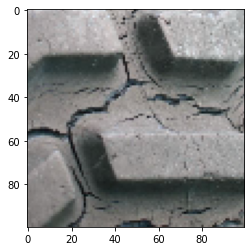

In [9]:
plt.imshow(train_data[0])

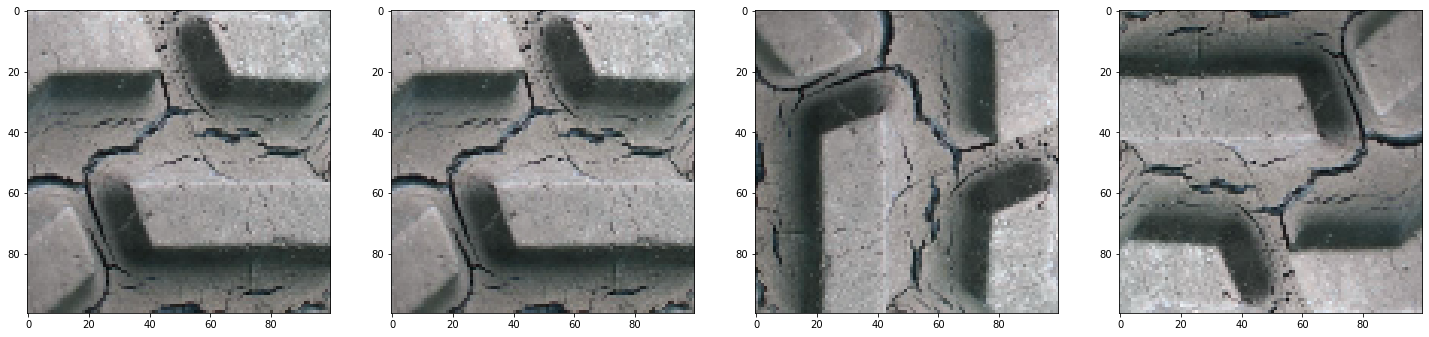

In [21]:
trainImage = train_data[0]

noise_traindata = trainImage.copy()
noise_traindata = (noise_traindata + np.random.rand(*noise_traindata.shape)/1.1)
noise_traindata = noise_traindata/np.max(noise_traindata)

rot90 = trainImage.copy()
rot90 = cv2.rotate(rot90,cv2.ROTATE_90_CLOCKWISE)

imgflip = trainImage.copy()
imgflip = cv2.flip(imgflip, -1)

plt.figure(figsize=(25,25))

plt.subplot(2,4,2)
plt.imshow(noise_traindata)

plt.subplot(2,4,1)
plt.imshow(trainImage)

plt.subplot(2,4,3)
plt.imshow(rot90)

plt.subplot(2,4,4)
plt.imshow(imgflip)

plt.show()

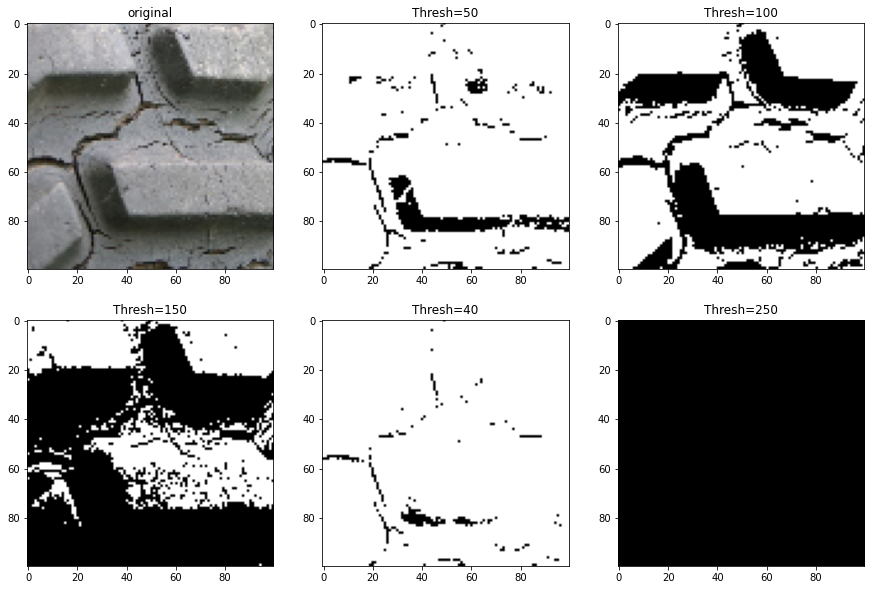

In [30]:
#########
# import opencv
import cv2 as cv
# import pyplot for ploting or displaying

# # image file path
# imgPath = 'assets/ca.jpg'
# # read image file
# img = cv.imread(imgPath)

img = train_data[0] 

# convert to gray
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# display
plt.figure(figsize=(15,10))

#########
plt.subplot(231)
imgRGB = img[:,:,::-1]
plt.title('original')
plt.imshow(imgRGB)
#########
# apply thresh on gray image
thresh = 50
maxval = 255
ret, imgGrayThresh = cv.threshold(imgGray, thresh, maxval, cv.THRESH_BINARY)
plt.subplot(2,3,2)
imgRGB = cv.cvtColor(imgGrayThresh, cv.COLOR_GRAY2RGB)
plt.title(f'Thresh={thresh}')
plt.imshow(imgRGB)
#########
# apply thresh on gray image
thresh = 100
maxval = 255
ret, imgGrayThresh = cv.threshold(imgGray, thresh, maxval, cv.THRESH_BINARY)
plt.subplot(2,3,3)
imgRGB = cv.cvtColor(imgGrayThresh, cv.COLOR_GRAY2RGB)
plt.title(f'Thresh={thresh}')
plt.imshow(imgRGB)
#########
# apply thresh on gray image
thresh = 150
maxval = 255
ret, imgGrayThresh = cv.threshold(imgGray, thresh, maxval, cv.THRESH_BINARY)
plt.subplot(2,3,4)
imgRGB = cv.cvtColor(imgGrayThresh, cv.COLOR_GRAY2RGB)
plt.title(f'Thresh={thresh}')
plt.imshow(imgRGB)
#########
# apply thresh on gray image
thresh = 40
maxval = 255
ret, imgGrayThresh = cv.threshold(imgGray, thresh, maxval, cv.THRESH_BINARY)
plt.subplot(2,3,5)
imgRGB = cv.cvtColor(imgGrayThresh, cv.COLOR_GRAY2RGB)
plt.title(f'Thresh={thresh}')
plt.imshow(imgRGB)
#########
# apply thresh on gray image
thresh = 250
maxval = 255
ret, imgGrayThresh = cv.threshold(imgGray, thresh, maxval, cv.THRESH_BINARY)
plt.subplot(2,3,6)
imgRGB = cv.cvtColor(imgGrayThresh, cv.COLOR_GRAY2RGB)
plt.title(f'Thresh={thresh}')
plt.imshow(imgRGB)
#########

# cleanup
plt.show()


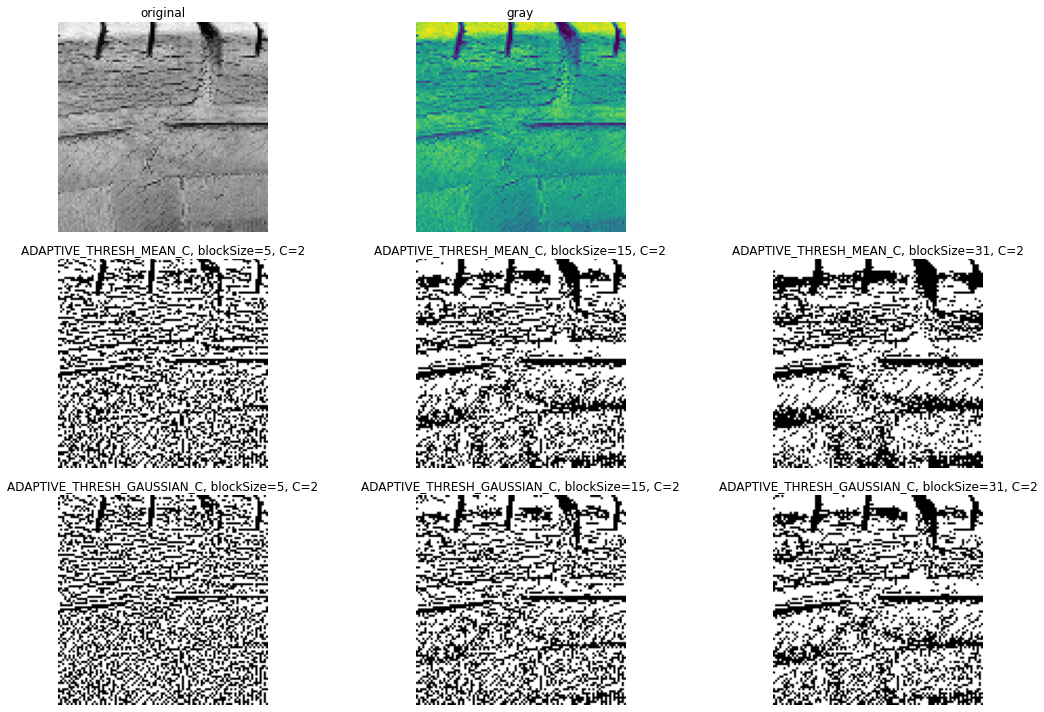

In [24]:
import cv2 as cv
import matplotlib.pyplot as plt

# imgPath = '../samples/data/sudoku.png'
# img = cv.imread(imgPath)

img = train_data[15] 

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(15,10))

# original
plt.subplot(331)
plt.imshow(img)
plt.title('original')
plt.axis('off')

plt.subplot(332)
plt.imshow(img_gray)
plt.title('gray')
plt.axis('off')

# 
maxval = 255
blockSize = 5
C = 2
thresh_img = cv.adaptiveThreshold(img_gray, maxval, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, blockSize=blockSize, C=C)
# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(334)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_MEAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')

blockSize = 15
C = 2
thresh_img = cv.adaptiveThreshold(img_gray, maxval, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, blockSize=blockSize, C=C)
# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(335)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_MEAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')

blockSize = 31
C = 2
thresh_img = cv.adaptiveThreshold(img_gray, maxval, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, blockSize=blockSize, C=C)
# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(336)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_MEAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')

blockSize = 5
C = 2
thresh_img = cv.adaptiveThreshold(img_gray, maxval, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, blockSize=blockSize, C=C)
# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(337)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_GAUSSIAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')

blockSize = 15
C = 2
thresh_img = cv.adaptiveThreshold(img_gray, maxval, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, blockSize=blockSize, C=C)
# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(338)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_GAUSSIAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')

blockSize = 31
C = 2
thresh_img = cv.adaptiveThreshold(img_gray, maxval, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, blockSize=blockSize, C=C)
# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(339)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_GAUSSIAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')


plt.tight_layout()

plt.show()